# Overview
**Sumber**

Hendratno, “COVID-19 Indonesia Dataset.” Kaggle, doi: 10.34740/KAGGLE/DSV/1314265. (https://www.kaggle.com/hendratno/covid19-indonesia)

**Context**

The COVID-19 dataset in Indonesia was created to find out various factors that could be taken into consideration in decision making related to the level of stringency in each province in Indonesia.

**Content**

Data compiled based on time series, both on a country level (Indonesia), and on a province level. If needed in certain provinces, it might also be provided at the city / regency level. Demographic data is also available, as well as calculations between demographic data and COVID-19 pandemic data.

**Acknowledgements**

Thank you to those who have provided data openly so that we can compile it into a dataset here, which is as follows: covid19.go.id, kemendagri.go.id, bps.go.id, and bnpb-inacovid19.hub.arcgis.com

**About this file**
The COVID-19 pandemic dataset in Indonesia, time series. This dataset is a compilation of various open data sources, including: covid19.go.id (pandemic data), kemendagri.go.id (demographic data), bps.go.id (demographic data), as well as some calculations of the relationship of the data.

This dataset contains a time series of COVID-19 pandemic events in Indonesia, at the country level to province level. If possible, in the future I will provide it to the city/regency level.

# Import Standard Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Persiapan Data

In [2]:
df = pd.read_csv('data/covid19-timeseries.csv',parse_dates=['Date'])

In [3]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,3,0,0,3,501,20,39,...,106.836118,-6.204699,0.28,46.19,0.0,1.84,3.99%,7.78%,NaN,NaN
1,2020-03-01,ID-JB,Jawa Barat,3,0,0,3,3,5,4,...,107.603708,-6.920432,0.07,0.07,0.0,0.11,166.67%,133.33%,NaN,NaN
2,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,503,20,39,...,106.836118,-6.204699,0.18,46.38,0.0,1.84,3.98%,7.75%,0.67,1.0
3,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
4,2020-03-02,ID-JB,Jawa Barat,0,0,0,0,3,5,4,...,107.603708,-6.920432,0.00,0.07,0.0,0.11,166.67%,133.33%,0.00,1.0


In [4]:
df.head().T

,0,1,2,3,4
Date,2020-03-01 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-02 00:00:00,2020-03-02 00:00:00
Location ISO Code,ID-JK,ID-JB,ID-JK,IDN,ID-JB
Location,DKI Jakarta,Jawa Barat,DKI Jakarta,Indonesia,Jawa Barat
New Cases,3,3,2,2,0
New Deaths,0,0,0,0,0
New Recovered,0,0,0,0,0
New Active Cases,3,3,2,2,0
Total Cases,501,3,503,2,3
Total Deaths,20,5,20,0,5
Total Recovered,39,4,39,0,4


In [5]:
df['Location'].unique(),len(df['Location'].unique())

(array(['DKI Jakarta', 'Jawa Barat', 'Indonesia', 'Banten',
        'Sulawesi Tenggara', 'Kalimantan Timur',
        'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Tengah',
        'Jawa Timur', 'Sulawesi Selatan', 'Maluku', 'Papua',
        'Maluku Utara', 'Aceh', 'Kalimantan Tengah', 'Lampung',
        'Sulawesi Tengah', 'Sumatera Barat', 'Papua Barat',
        'Kalimantan Utara', 'Sulawesi Barat', 'Sumatera Selatan', 'Bali',
        'Kalimantan Barat', 'Riau', 'Jambi', 'Kalimantan Selatan',
        'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Bengkulu',
        'Nusa Tenggara Barat', 'Sulawesi Utara', 'Nusa Tenggara Timur',
        'Gorontalo'], dtype=object),
 35)

# Pembersihan & Pemilihan Data

In [49]:
parameter = ['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate']

In [7]:
dataframe = pd.DataFrame(columns=parameter)

In [8]:
dataframe.head()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate


In [9]:
for param in parameter:
    dataframe[param] = df[param][df.Location == 'Indonesia']

In [10]:
dataframe.reset_index(inplace=True,drop=True)

In [14]:
dataframe.tail()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate
123,2020-07-03,60695,3036,27568,30091,5.00%,45.42%
124,2020-07-04,62142,3089,28219,30834,4.97%,45.41%
125,2020-07-05,63749,3171,29105,31473,4.97%,45.66%
126,2020-07-06,64958,3241,29919,31798,4.99%,46.06%
127,2020-07-07,66226,3309,30785,32132,5.00%,46.48%


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 128 non-null    datetime64[ns]
 1   Total Cases          128 non-null    int64         
 2   Total Deaths         128 non-null    int64         
 3   Total Recovered      128 non-null    int64         
 4   Total Active Cases   128 non-null    int64         
 5   Case Fatality Rate   128 non-null    object        
 6   Case Recovered Rate  128 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 7.1+ KB


# Konversi Data ke Numerical

In [15]:
percent_data = ['Case Fatality Rate','Case Recovered Rate']

In [22]:
for col in percent_data:
    temp = []
    for row in range(len(dataframe[col])):
        temp.append(float(dataframe[col][row][:-1]))
    dataframe.drop([col],axis=1,inplace=True)
    dataframe[col] = temp

In [24]:
dataframe.tail()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate
123,2020-07-03,60695,3036,27568,30091,5.00,45.42
124,2020-07-04,62142,3089,28219,30834,4.97,45.41
125,2020-07-05,63749,3171,29105,31473,4.97,45.66
126,2020-07-06,64958,3241,29919,31798,4.99,46.06
127,2020-07-07,66226,3309,30785,32132,5.00,46.48


In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 128 non-null    datetime64[ns]
 1   Total Cases          128 non-null    int64         
 2   Total Deaths         128 non-null    int64         
 3   Total Recovered      128 non-null    int64         
 4   Total Active Cases   128 non-null    int64         
 5   Case Fatality Rate   128 non-null    float64       
 6   Case Recovered Rate  128 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 7.1 KB


# Visualisasi Data

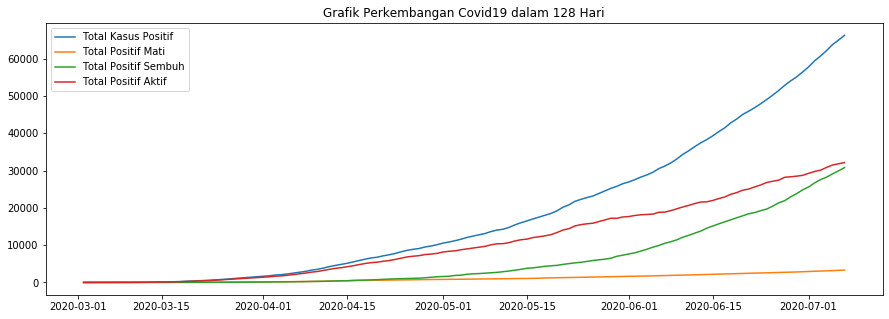

In [70]:
plt.figure(figsize=(15,5))
plt.title('Grafik Perkembangan Covid19 dalam 128 Hari')
plt.plot(dataframe['Date'],dataframe['Total Cases'],label='Total Kasus Positif')
plt.plot(dataframe['Date'],dataframe['Total Deaths'],label='Total Positif Mati')
plt.plot(dataframe['Date'],dataframe['Total Recovered'],label='Total Positif Sembuh')
plt.plot(dataframe['Date'],dataframe['Total Active Cases'],label='Total Positif Aktif')
plt.legend()

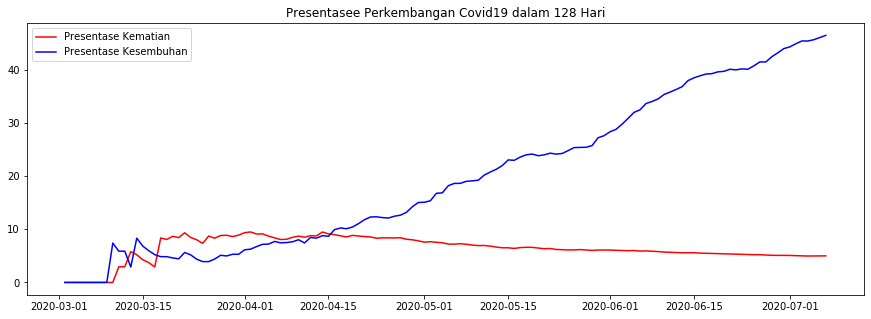

In [75]:
plt.figure(figsize=(15,5))
plt.title('Presentasee Perkembangan Covid19 dalam 128 Hari')
plt.plot(dataframe['Date'],dataframe['Case Fatality Rate'],'r',label='Presentase Kematian')
plt.plot(dataframe['Date'],dataframe['Case Recovered Rate'],'b',label='Presentase Kesembuhan')
plt.legend()

# Split Data

In [41]:
case_x = dataframe.drop(['Total Cases','Total Deaths','Total Recovered','Total Active Cases'],axis=1)
case_y = dataframe['Total Cases']

In [42]:
death_x = dataframe.drop(['Total Cases','Total Deaths','Total Recovered','Total Active Cases'],axis=1)
death_y = dataframe['Total Deaths']

In [43]:
recovered_x = dataframe.drop(['Total Cases','Total Deaths','Total Recovered','Total Active Cases'],axis=1)
recovered_y = dataframe['Total Recovered']

In [44]:
active_x = dataframe.drop(['Total Cases','Total Deaths','Total Recovered','Total Active Cases'],axis=1)
active_y = dataframe['Total Active Cases']

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
case_x_train,case_x_test,case_y_train,case_y_test = train_test_split(case_x,case_y,test_size=0.2)

In [45]:
death_x_train,death_x_test,death_y_train,death_y_test = train_test_split(death_x,death_y,test_size=0.2)

In [46]:
recovered_x_train,recovered_x_test,recovered_y_train,recovered_y_test = train_test_split(recovered_x,recovered_y,test_size=0.2)

In [47]:
active_x_train,active_x_test,active_y_train,active_y_test = train_test_split(active_x,active_y,test_size=0.2)

# Machine Learning Model

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
semua_data = [
    (case_x_train,case_x_test,case_y_train,case_y_test),
    (death_x_train,death_x_test,death_y_train,death_y_test),
    (recovered_x_train,recovered_x_test,recovered_y_train,recovered_y_test),
    (active_x_train,active_x_test,active_y_train,active_y_test)
]

In [77]:
model = RandomForestRegressor()